# EDA

### Importing and reading the data file

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('../data/raw/airline_sentiment_analysis.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)

In [17]:
df.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


### Data Statistics

In [18]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 11541
Number of columns: 2


In [19]:
print(f"Number of missing values in each column: {df.isnull().sum()}")

Number of missing values in each column: airline_sentiment    0
text                 0
dtype: int64


So there are 11541 data points, and 2 columns, first is the sentiment column (our target variable), second is the text columns which contains the tweet about the review of the airline.

There is also no missing values.

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

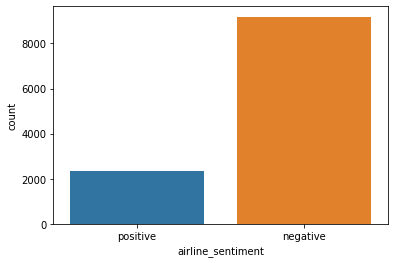

In [21]:
sns.countplot(x='airline_sentiment', data=df)

So this is an imbalanced dataset. Thus we might want to choose our metrics a bit carefully.

In [24]:
df["airline_mentioned"] = df["text"].apply(lambda x: x.split()[0].replace("@", ""))

In [29]:
print(f"Number of unique airlines mentioned: {df.airline_mentioned.nunique()}")

Number of unique airlines mentioned: 197


In [42]:
print(f"The most common airline mentioned is {df.airline_mentioned.value_counts()[:25]}")

The most common airline mentioned is united           2904
USAirways        2394
AmericanAir      2201
SouthwestAir     1678
JetBlue          1349
VirginAmerica     308
United             93
usairways          73
jetblue            28
.united            28
americanair        27
united,            25
southwestair       25
“JetBlue:          20
.AmericanAir       18
SouthwestAir,      14
“united:           14
.JetBlue           13
.USAirways         13
virginamerica      11
“AmericanAir:      11
united.            10
.SouthwestAir       9
I                   9
Thank               8
Name: airline_mentioned, dtype: int64


So there are mainly 6 airlines mentioned USAirways, AmericanAir, SouthwestAir, Jetblue, VirginAmerica, United.

<AxesSubplot:xlabel='airline_mentioned'>

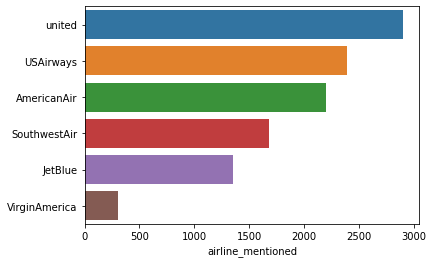

In [46]:
sns.barplot(x = df.airline_mentioned.value_counts()[:6], y = df.airline_mentioned.value_counts()[:6].index)

We will also have to insure that the accuracy for each of these airlines is good enough.

### Incorrect @ Statistics

In [49]:
correct_mentions = sum(df.airline_mentioned.value_counts()[:6])
incorrect_mentions = sum(df.airline_mentioned.value_counts()[6:])

In [65]:
print(f"number of correct airline mentions is {correct_mentions}")
print(f"number of incorrect airline mentions is {incorrect_mentions}")
print(f"% of incorrect airline mentions is { (1 - (incorrect_mentions / correct_mentions)) * 100}")

number of correct airline mentions is 10834
number of incorrect airline mentions is 707
% of incorrect airline mentions is 93.4742477386007


### Text Data Analysis

In [60]:
print(f"% of rows which contain @ symbol is {df[df.text.str.contains('@')].shape[0]/len(df) * 100}%")

% of rows which contain @ symbol is 100.0%


In [68]:
print(f"Number of rows which don't contain @ as their first character: {df[~df.text.str.startswith('@')].shape[0]}")

Number of rows which don't contain @ as their first character: 299


In [70]:
df[~df.text.str.startswith('@')].sample(20)

,airline_sentiment,text,airline_mentioned
1534,positive,Very quick! TY. @united: @auciello I am sorry ...,Very
101,negative,.@VirginAmerica does that mean you don't have ...,.VirginAmerica
5503,positive,Kudos well deserved! Just wish the rest of my ...,Kudos
2260,positive,“@united: @d_goodspeed We will follow up with ...,“united:
1619,negative,.@united I wouldn't describe feces sprinkled i...,.united
2963,negative,“@united: @qlyss8 We don't want our customers ...,“united:
8146,negative,All followers please note that @USAirways is n...,All
9614,positive,"Thank you, @AmericanAir! Much appreciated.",Thank
5399,negative,Do less please @JetBlue,Do
5964,negative,“@JetBlue: @benjaminokeefe Thanks for includin...,“JetBlue:
